In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
def GeneratePathsGBMEulerAndMilstein(NoOfPaths,NoOfSteps,T,r,sigma,S_0):
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps+1])

    # Approximation
    S1_Euler = np.zeros([NoOfPaths, NoOfSteps+1])
    S1_Euler[:,0] =S_0

    S1_Milstein = np.zeros([NoOfPaths, NoOfSteps+1])
    S1_Milstein[:,0] =S_0

    # Exact
    S2 = np.zeros([NoOfPaths, NoOfSteps+1])
    S2[:,0] =S_0

    time = np.zeros([NoOfSteps+1])

    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]

        S1_Euler[:,i+1] = S1_Euler[:,i] + r * S1_Euler[:,i]* dt + sigma * S1_Euler[:,i] * (W[:,i+1] - W[:,i])

        S1_Milstein[:,i+1] = S1_Milstein[:,i] + r * S1_Milstein[:,i]* dt + sigma * S1_Milstein[:,i] * (W[:,i+1] - W[:,i]) \
                    + 0.5 * sigma**2 * S1_Milstein[:,i] * (np.power((W[:,i+1] - W[:,i]),2) - dt)

        S2[:,i+1] = S2[:,i] * np.exp((r - 0.5*sigma*sigma) *dt + sigma * (W[:,i+1] - W[:,i]))
        time[i+1] = time[i] +dt

    # Retun S1 and S2
    paths = {"time":time,"S1_Euler":S1_Euler,"S1_Milstein": S1_Milstein, "S2":S2}
    return paths

def mainCalculation():
    NoOfPaths = 25
    NoOfSteps = 25
    T = 1
    r = 0.06
    sigma = 0.3
    S_0 = 50
    NoOfSteps = 10
    
    # Strong convergence comparison
    NoOfPaths = 100
    
    Paths = GeneratePathsGBMEulerAndMilstein(NoOfPaths,NoOfSteps,T,r,sigma,S_0)
    # Get the paths at T
    S1_Euler_atT = Paths["S1_Euler"][:,-1]
    S1_Milstein_atT = Paths["S1_Milstein"][:,-1]
    S2_atT = Paths["S2"][:,-1]
    
    errorStrong_Euler = S1_Euler_atT-S2_atT
    errorStrong_Milstein = S1_Milstein_atT-S2_atT
    
    # Plot histograms
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(errorStrong_Euler, bins=20, density=True, alpha=0.6, color='g')
    plt.title('Error Strong Euler')
    plt.xlabel('Error')
    plt.ylabel('Density')
    plt.xlim(-10, 4)  # Setting the x-axis limits
    plt.grid()
    
    plt.subplot(1, 2, 2)
    plt.hist(errorStrong_Milstein, bins=20, density=True, alpha=0.6, color='b')
    plt.title('Error Strong Milstein')
    plt.xlabel('Error')
    plt.ylabel('Density')
    plt.xlim(-10, 4)  # Setting the x-axis limits
    plt.grid()
    
    plt.tight_layout()
    plt.show()

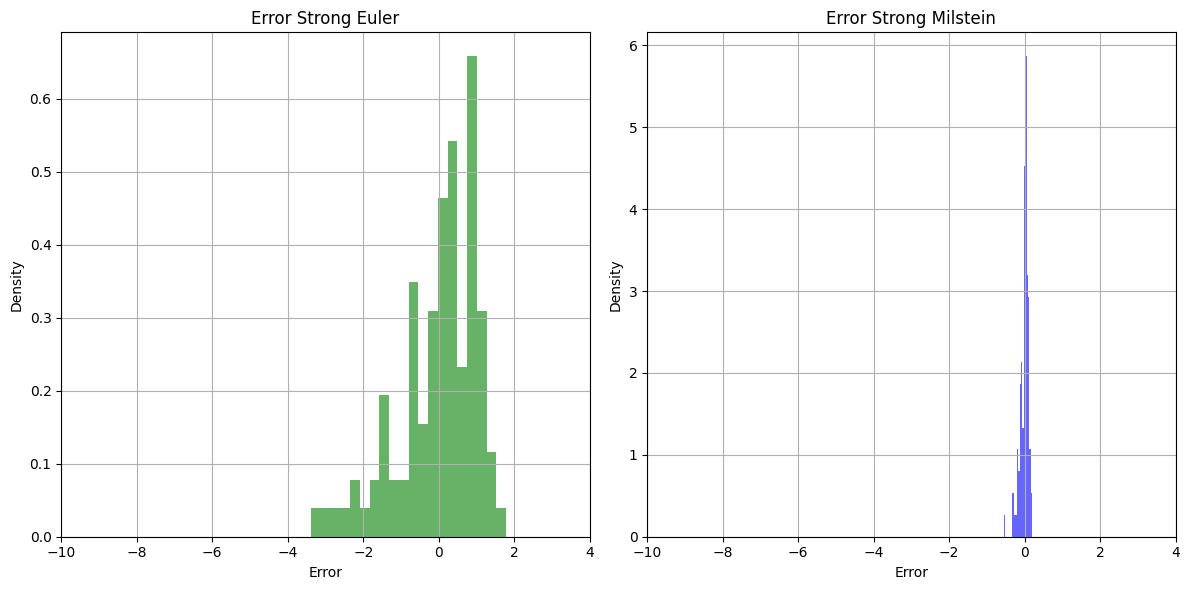

In [3]:
mainCalculation()